In [32]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from pprint import pprint
import datetime
import time
from matplotlib.pyplot import figure

In [57]:
# Preview data
youtube_2018 = pd.read_csv("output/youtube2018.csv")
del youtube_2018["Unnamed: 0"]
youtube_2018.head()

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_dow,publish_date,publish_mhs,trending year
0,x4TZEVqKIvs,01/01/18,Film Theory: Disney LIED to You! (High School ...,The Film Theorists,1.0,"high school musical|""disney""|""high school musi...",2993235.0,135820.0,6207.0,19539.0,https://i.ytimg.com/vi/x4TZEVqKIvs/default.jpg,False,False,False,SUBSCRIBE for More Film Theories! ► http://bit...,Sat,12/30/2017,20:15:11,2018.0
1,PjqKPHZJgF0,01/01/18,Lil Wayne - Family Feud feat. Drake (Official ...,Lil Wayne,10.0,"lil wayne|""weezy""|""weezy wednesday""|""wayne car...",3266020.0,97709.0,4748.0,14172.0,https://i.ytimg.com/vi/PjqKPHZJgF0/default.jpg,False,False,False,"Family Feud by Lil Wayne feat. Drake, off the ...",Fri,12/29/2017,22:59:01,2018.0
2,O6BODAJVYc8,01/01/18,"2017, in 7 minutes",Vox,25.0,"vox.com|""vox""|""explain""|""year in review""|""2017...",1565942.0,69361.0,13150.0,18227.0,https://i.ytimg.com/vi/O6BODAJVYc8/default.jpg,False,False,False,"In a tumultuous 2017, these are some of the st...",Sat,12/30/2017,13:00:04,2018.0
3,mDRifR9HdK8,01/01/18,Best Pet Videos of the Year 2017!,The Pet Collective,15.0,"the pet collective|""pet collective""|""the pet c...",277046.0,6878.0,265.0,389.0,https://i.ytimg.com/vi/mDRifR9HdK8/default.jpg,False,False,False,2017 has been quite the year and I don't know ...,Sat,12/30/2017,14:00:04,2018.0
4,HqwVFXyCfOI,01/01/18,Best of Hevesh5 (8),Hevesh5,24.0,"domino|""dominos""|""dominoes""|""best of hevesh5""|...",630580.0,7512.0,451.0,562.0,https://i.ytimg.com/vi/HqwVFXyCfOI/default.jpg,False,False,False,Here is the 8th Best of Hevesh5 compilation fe...,Sat,12/30/2017,18:00:01,2018.0


In [3]:
# describe 2018 data
youtube_2018.describe()

,category_id,views,likes,dislikes,comment_count,trending year
count,31349.000000,3.134900e+04,3.134900e+04,3.134900e+04,3.134900e+04,31281.0
mean,19.974959,2.686777e+06,8.245072e+04,3.922386e+03,9.255513e+03,2018.0
std,7.570850,7.921209e+06,2.433361e+05,2.516193e+04,3.932741e+04,0.0
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2018.0
25%,17.000000,3.173550e+05,7.268000e+03,2.630000e+02,7.700000e+02,2018.0
50%,24.000000,8.289090e+05,2.149700e+04,7.540000e+02,2.193000e+03,2018.0
75%,25.000000,2.121136e+06,6.393900e+04,2.260000e+03,6.710000e+03,2018.0
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,2018.0


In [4]:
# Top 20 channels
youtube_2018["channel_title"].value_counts().head(20)

ESPN                                      158
TheEllenShow                              155
Jimmy Kimmel Live                         154
The Tonight Show Starring Jimmy Fallon    150
The Late Show with Stephen Colbert        150
Netflix                                   148
Vox                                       145
CNN                                       144
TED-Ed                                    142
NBA                                       137
Screen Junkies                            136
BuzzFeedVideo                             136
Late Night with Seth Meyers               135
Saturday Night Live                       131
WIRED                                     130
HellthyJunkFood                           129
INSIDER                                   128
Tasty                                     125
The Late Late Show with James Corden      124
Bon Appétit                               124
Name: channel_title, dtype: int64

In [5]:
#Using median as measure of central tendency due to distribution of data
print(f"Median Views: {int(youtube_2018['views'].median())}")
print(f"Median Likes: {int(youtube_2018['likes'].median())}")
print(f"Median Dislikes: {int(youtube_2018['dislikes'].median())}")
print(f"Median Comment Count: {int(youtube_2018['comment_count'].median())}")

Median Views: 828909
Median Likes: 21497
Median Dislikes: 754
Median Comment Count: 2193


In [25]:
dow_df = pd.DataFrame(youtube_2018['publish_dow'].value_counts())
dow_df = dow_df.rename(columns={"publish_dow": "Count"})
dow_df

,Count
Thu,5577
Fri,5436
Wed,4928
Tue,4886
Mon,4714
Sun,3048
Sat,2692


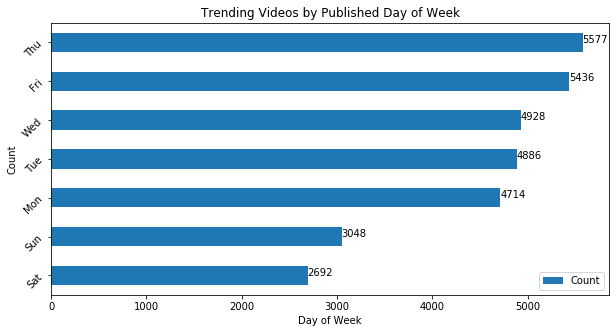

In [39]:
dow_df.plot.barh(rot=45)
plt.title("Trending Videos by Published Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.gca().invert_yaxis()

y= dow_df["Count"]
for index, value in enumerate(y):
    plt.text(value, index, str(value))

fig = plt.gcf()
fig.set_size_inches(10,5)

In [59]:
# Create function to count number of tags
def TagCount(text): 
    return len(text.split('|'))

In [61]:
# Calculate the number of tags per video and add to DF
youtube_2018["tag_num"] = ""

for index, row in youtube_2018.iterrows():      
    # Get date at each row
    tags = row["tags"]
    youtube_2018.loc[index, "tag_num"]= TagCount(str(tags))

youtube_2018.head()

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_dow,publish_date,publish_mhs,trending year,tag_num
0,x4TZEVqKIvs,01/01/18,Film Theory: Disney LIED to You! (High School ...,The Film Theorists,1.0,"high school musical|""disney""|""high school musi...",2993235.0,135820.0,6207.0,19539.0,https://i.ytimg.com/vi/x4TZEVqKIvs/default.jpg,False,False,False,SUBSCRIBE for More Film Theories! ► http://bit...,Sat,12/30/2017,20:15:11,2018.0,22
1,PjqKPHZJgF0,01/01/18,Lil Wayne - Family Feud feat. Drake (Official ...,Lil Wayne,10.0,"lil wayne|""weezy""|""weezy wednesday""|""wayne car...",3266020.0,97709.0,4748.0,14172.0,https://i.ytimg.com/vi/PjqKPHZJgF0/default.jpg,False,False,False,"Family Feud by Lil Wayne feat. Drake, off the ...",Fri,12/29/2017,22:59:01,2018.0,31
2,O6BODAJVYc8,01/01/18,"2017, in 7 minutes",Vox,25.0,"vox.com|""vox""|""explain""|""year in review""|""2017...",1565942.0,69361.0,13150.0,18227.0,https://i.ytimg.com/vi/O6BODAJVYc8/default.jpg,False,False,False,"In a tumultuous 2017, these are some of the st...",Sat,12/30/2017,13:00:04,2018.0,12
3,mDRifR9HdK8,01/01/18,Best Pet Videos of the Year 2017!,The Pet Collective,15.0,"the pet collective|""pet collective""|""the pet c...",277046.0,6878.0,265.0,389.0,https://i.ytimg.com/vi/mDRifR9HdK8/default.jpg,False,False,False,2017 has been quite the year and I don't know ...,Sat,12/30/2017,14:00:04,2018.0,26
4,HqwVFXyCfOI,01/01/18,Best of Hevesh5 (8),Hevesh5,24.0,"domino|""dominos""|""dominoes""|""best of hevesh5""|...",630580.0,7512.0,451.0,562.0,https://i.ytimg.com/vi/HqwVFXyCfOI/default.jpg,False,False,False,Here is the 8th Best of Hevesh5 compilation fe...,Sat,12/30/2017,18:00:01,2018.0,30


In [89]:
# Total the counts of tags
tag_count_df = pd.DataFrame(youtube_2018['tag_num'].value_counts().head(10))
tag_count_df = tag_count_df.rename(columns={"tag_num": "Count"})
tag_count_df

,Count
1,1851
10,1155
4,1066
24,1042
25,1039
7,1027
30,947
13,933
27,896
9,895


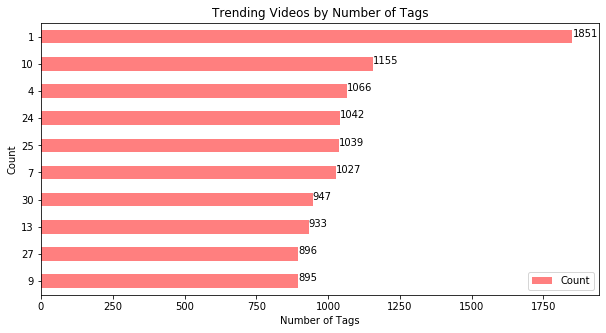

In [92]:
tag_count_df.plot.barh(color='r', alpha=0.5, rot=0)
plt.title("Trending Videos by Number of Tags")
plt.xlabel("Number of Tags")
plt.ylabel("Count")
plt.gca().invert_yaxis()

y= tag_count_df["Count"]
for index, value in enumerate(y):
    plt.text(value, index, str(value))

fig = plt.gcf()
fig.set_size_inches(10,5)

In [66]:
# Get total count per catefory and create DF
top5_categories = pd.DataFrame(youtube_2018['category_id'].value_counts())

top5_categories["id"] = ''
for index, row in top5_categories.iterrows():      
    top5_categories.loc[index, "id"] = index

top5_categories = top5_categories.sort_values(by=['id'])

In [67]:
# import category list from YouTube API as DF
category_list = pd.read_csv("output/YouTube_Categories.csv")
del category_list["Unnamed: 0"]
category_list = category_list.sort_values(by=['id'])

In [84]:
# merge df into one df
merged_category = pd.merge(top5_categories, category_list, on="id", how="left")
sorted_category = merged_category.sort_values(by=['category_id'], ascending=False)
sorted_category.rename(columns = {'category_id':'category_counts'}, inplace = True)
sorted_category = sorted_category[["id", "category","category_counts"]]
sorted_category.head()

,id,category,category_counts
9,24,Entertainment,7625
2,10,Music,4909
11,26,Howto & Style,3267
8,23,Comedy,2563
7,22,People & Blogs,2445


Text(0, 0.5, 'Count')

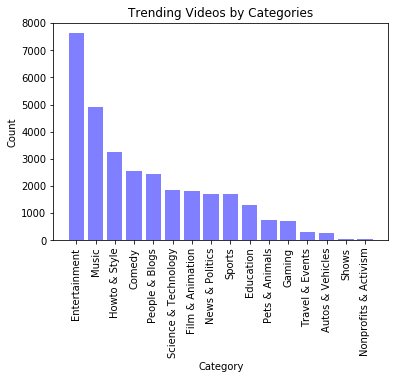

In [94]:
x = sorted_category["category"]
y = sorted_category["category_counts"]

tick_locations = [value for value in x]

plt.bar(x, y, color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, sorted_category["category"], rotation="vertical")

plt.title("Trending Videos by Categories")
plt.xlabel("Category")
plt.ylabel("Count")
